In [93]:
#importando bibliotecas

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

from sklearn.metrics import r2_score

In [39]:
df = pd.read_csv("comp_bikes_mod.csv")

In [40]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [43]:
print("Instâncias : {}".format(df.shape[0]))
print("Atributos: {}".format(df.shape[1]))

Instâncias : 17379
Atributos: 17


In [42]:
df.dtypes

instant       float64
dteday         object
season        float64
yr            float64
mnth          float64
hr            float64
holiday       float64
weekday       float64
workingday    float64
weathersit    float64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
dtype: object

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [45]:
print("Porcentagem valores nulos coluna temp: {:.0f} % ".format((df['temp'].isnull().sum()/df.shape[0])*100))

Porcentagem valores nulos coluna temp: 10 % 


In [46]:
df_drop = df.dropna(subset = ['dteday'])

print("Instâncias: {}".format(df_drop.shape[0]))
print("Atributos: {}".format(df_drop.shape[1]))

Instâncias: 15641
Atributos: 17


In [47]:
#Considerando o dataframe após a retirada dos valores nulos da coluna dteday, calcularemos a média de temperatura

print("Média coluna temp: {:.4f}".format(df_drop['temp'].mean()))

Média coluna temp: 0.4969


In [48]:
#Cálculo do desvio padrão da coluna windspeed

print("Desvio Padrão: {}".format(df_drop['windspeed'].std()))

Desvio Padrão: 0.12230930508286268


In [49]:
df_drop['season'].value_counts()

3.0    3623
2.0    3523
4.0    3478
1.0    3437
Name: season, dtype: int64

In [50]:
df_drop['dteday'].tail()

17373    2012-12-31
17374    2012-12-31
17375    2012-12-31
17377    2012-12-31
17378    2012-12-31
Name: dteday, dtype: object

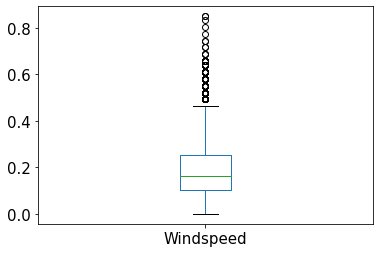

In [57]:
#Criando boxplot

df_drop['windspeed'].plot(kind = 'box', label = 'Windspeed', fontsize = 15)

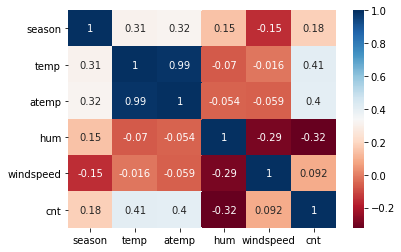

In [73]:
#Construindo matrix de correlação entre as variáveis

colunas = ['season','temp','atemp','hum','windspeed','cnt']

corr2 = df_drop[colunas].corr()
corr = df_drop[['hum','cnt']].corr()


sns.heatmap(corr2, cmap = 'RdBu', annot = True)

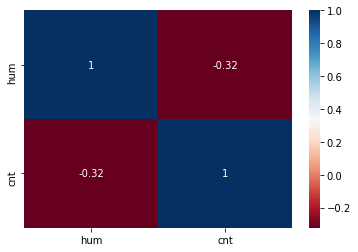

In [72]:
sns.heatmap(corr, cmap = 'RdBu', annot = True)

In [78]:
#Preenchendo valores nulos das colunas pela média

df_new = df_drop[['hum','cnt','casual']]

df_new = df_new.fillna(df_new.mean())
df_new.isnull().sum()

hum       0
cnt       0
casual    0
dtype: int64

In [80]:
#Separando as variáveis

X = df_new[['hum','casual']]
y = df_new['cnt']

In [84]:
#Criando nosso modelo de regressão linear

reg = LinearRegression()

modelo = reg.fit(X,y)

y_pred = modelo.predict(X)

In [87]:
#Avaliando o modelo utilizando o coeficiente de determinação

print("Coeficiente de determinação R2: {}".format(r2_score(y, y_pred)))

Coeficiente de determinação R2: 0.4059859251122173


In [91]:
#Criando nosso modelo de regressão linear

tree = DecisionTreeRegressor()

modelo_tree = tree.fit(X,y)

y_pred_tree = modelo_tree.predict(X)

In [96]:
#Coeficiente de determinação para o modelo de Árvores de Decisão como regressão

print("Coeficiente de determinação R2: {}".format(r2_score(y,y_pred_tree)))

Coeficiente de determinação R2: 0.7098339715834964
